# Lib

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3.1

Ex. 3.1  Read the images Pocker1.png and Pocker.png as grayscale images. Experiment with multiple types of thresholding by changing the parameter type and keeping the same threshold value for each image separately. Display and compare the output images.

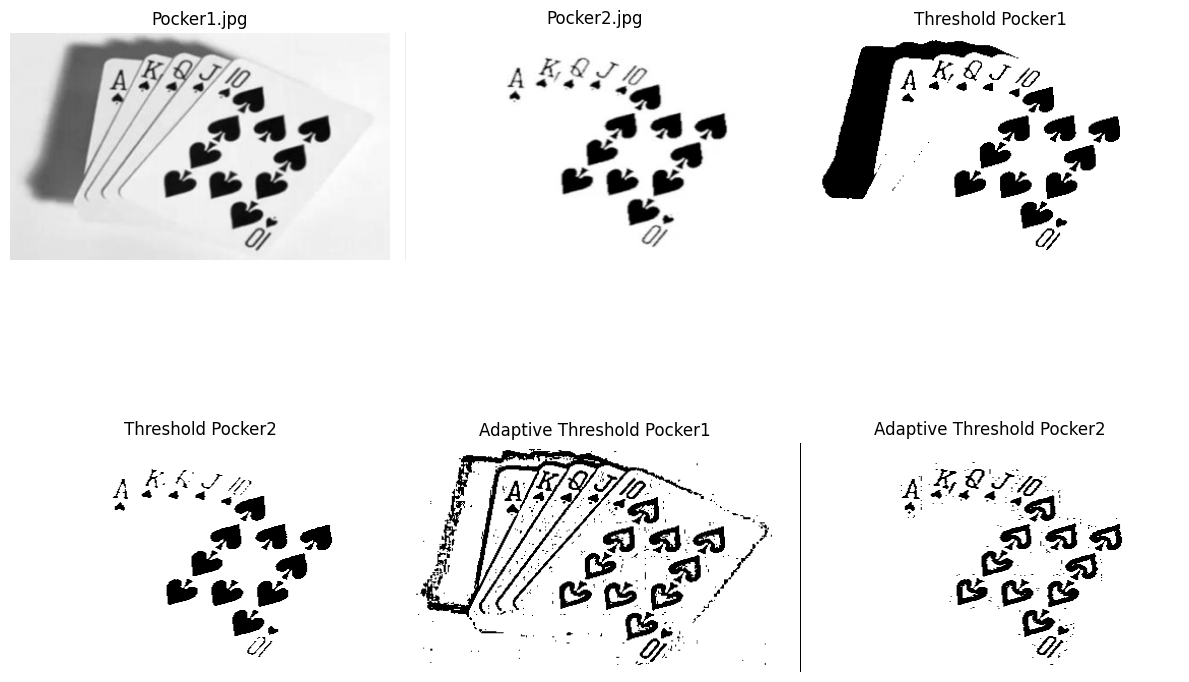

In [ ]:
image1 = cv2.imread('/content/drive/MyDrive/XuLyAnh/LabThucHanh/Image/Pocker1.PNG',  cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/drive/MyDrive/XuLyAnh/LabThucHanh/Image/Pocker2.PNG',  cv2.IMREAD_GRAYSCALE)

# Ngưỡng hóa
ret1, thresh1 = cv2.threshold(image1, 128, 255, cv2.THRESH_BINARY)  # Ngưỡng đơn giản
ret2, thresh2 = cv2.threshold(image2, 128, 255, cv2.THRESH_BINARY)  # Ngưỡng đơn giản

# Ngưỡng thích ứng
thresh1_adaptive = cv2.adaptiveThreshold(image1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         cv2.THRESH_BINARY, 11, 2)
thresh2_adaptive = cv2.adaptiveThreshold(image2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         cv2.THRESH_BINARY, 11, 2)

# Hiển thị kết quả
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.title('Pocker1.jpg')
plt.imshow(image1, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Pocker2.jpg')
plt.imshow(image2, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Threshold Pocker1')
plt.imshow(thresh1, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Threshold Pocker2')
plt.imshow(thresh2, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Adaptive Threshold Pocker1')
plt.imshow(thresh1_adaptive, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Adaptive Threshold Pocker2')
plt.imshow(thresh2_adaptive, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

Ex. 3.2 Read the image moon.jpg’ as grayscale and repeat the previous exercise. Comment on the output.

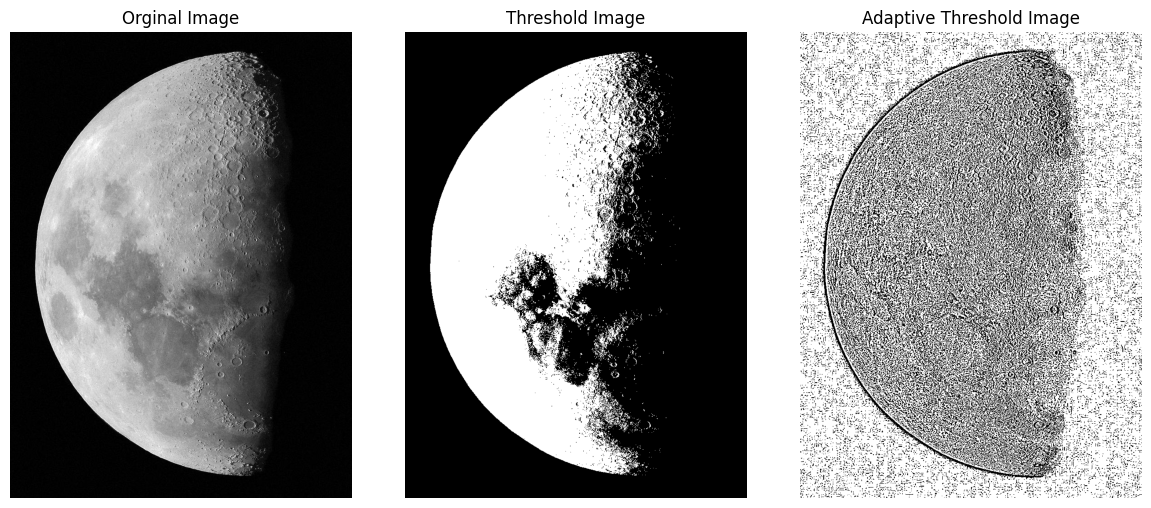

In [ ]:
image = cv2.imread('/content/drive/MyDrive/XuLyAnh/LabThucHanh/Image/moon.jpg',  cv2.IMREAD_GRAYSCALE)

# Ngưỡng hóa
ret1, thresh1 = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)  # Ngưỡng đơn giản

# Ngưỡng thích ứng
thresh1_adaptive = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         cv2.THRESH_BINARY, 11, 2)

# Hiển thị kết quả
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.title('Orginal Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Threshold Image')
plt.imshow(thresh1, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Adaptive Threshold Image')
plt.imshow(thresh1_adaptive, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

Ngưỡng tìm được:  87.35810303393568


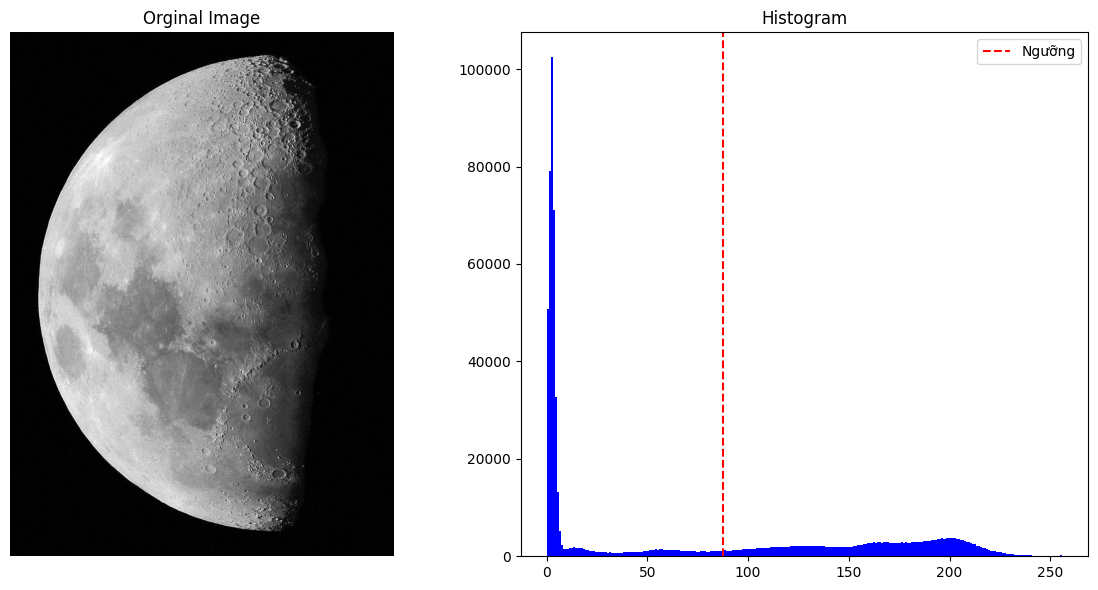

In [ ]:
def tim_nguong_toan_cuc(image):
    t = np.mean(image)
    g1 = []
    g2 = []
    m, n = image.shape

    while True:
        g1.clear()  # Xóa danh sách g1
        g2.clear()  # Xóa danh sách g2

        for i in range(m):
            for j in range(n):
                if image[i, j] < t:
                    g1.append(image[i, j])
                else:
                    g2.append(image[i, j])

        # Tính giá trị trung bình mới cho từng nhóm
        m1 = np.mean(g1) if g1 else 0
        m2 = np.mean(g2) if g2 else 0
        t_new = (m1 + m2) / 2
        delta_t = abs(t_new - t)

        if delta_t < 1:
            break
        t = t_new  # Cập nhật ngưỡng t

    print('Ngưỡng tìm được: ', t)
    return t

# Tìm ngưỡng toàn cục
threshold = tim_nguong_toan_cuc(image)

# Vẽ histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Orginal Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Histogram')
plt.hist(image.ravel(), bins=256, range=[0, 256], color='blue')
plt.axvline(x=threshold, color='red', linestyle='--', label='Ngưỡng')
plt.legend()

plt.tight_layout()
plt.show()

Ex. 3.3 Read the image ‘adeverinta.jpg’ as grayscale and  apply adaptive thresholding (both options). Compare the results with the ones from Ex. 3.2 and justify the outputs.  The image has different lighting conditions in different areas and a  smoothing filter  applied  before using adaptive thresholding  will reduce the noise.

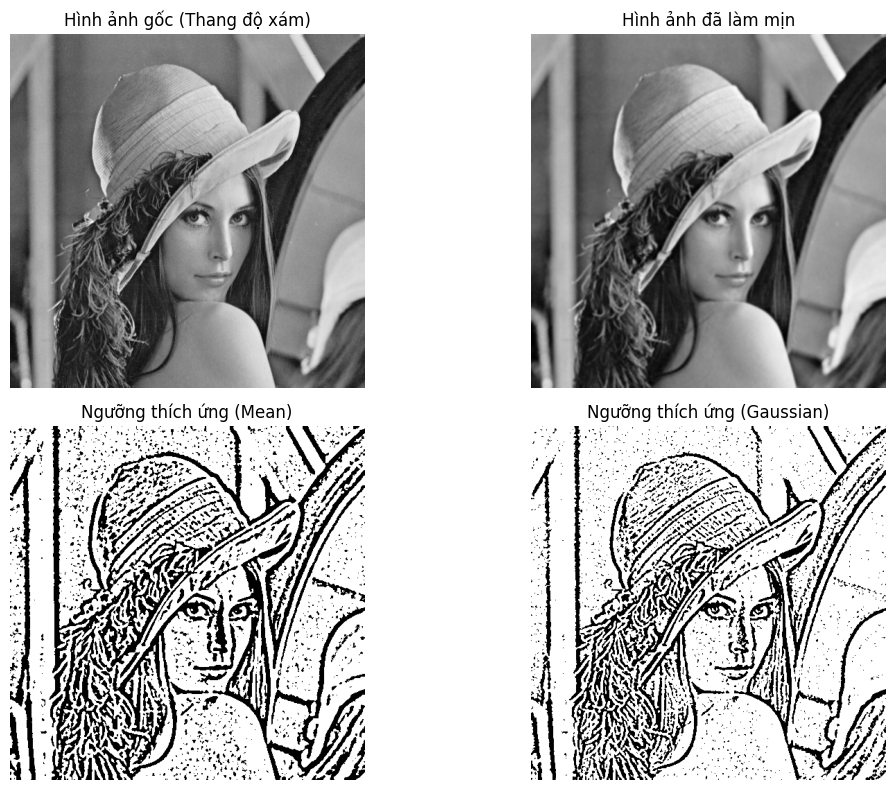

In [ ]:
# Đọc hình ảnh dưới dạng thang độ xám
image = cv2.imread('/content/drive/MyDrive/XuLyAnh/LabThucHanh/Image/lena.jpg', cv2.IMREAD_GRAYSCALE)

# Hàm áp dụng ngưỡng thích ứng
def apply_adaptive_thresholding(image, method='mean', block_size=11, C=2):
    if method == 'mean':
        return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, C)
    elif method == 'gaussian':
        return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C)

# Áp dụng làm mịn Gaussian để giảm nhiễu
smoothed_image = cv2.GaussianBlur(image, (5, 5), 0)

# Áp dụng ngưỡng thích ứng với cả hai phương pháp
adaptive_mean = apply_adaptive_thresholding(smoothed_image, method='mean')
adaptive_gaussian = apply_adaptive_thresholding(smoothed_image, method='gaussian')

# Vẽ kết quả
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Hình ảnh gốc (Thang độ xám)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Hình ảnh đã làm mịn')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(adaptive_mean, cmap='gray')
plt.title('Ngưỡng thích ứng (Mean)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(adaptive_gaussian, cmap='gray')
plt.title('Ngưỡng thích ứng (Gaussian)')
plt.axis('off')

plt.tight_layout()
plt.show()

Ex.  3.4  Read  the  images  ‘rose.jpg’  and  ‘yellowFl.jpg’  as  grayscale  and  apply  Otsu  thresholding. Compare the results with the previous methods.  Experiment  also  with  gaussian smoothing before the Otsu binarization.

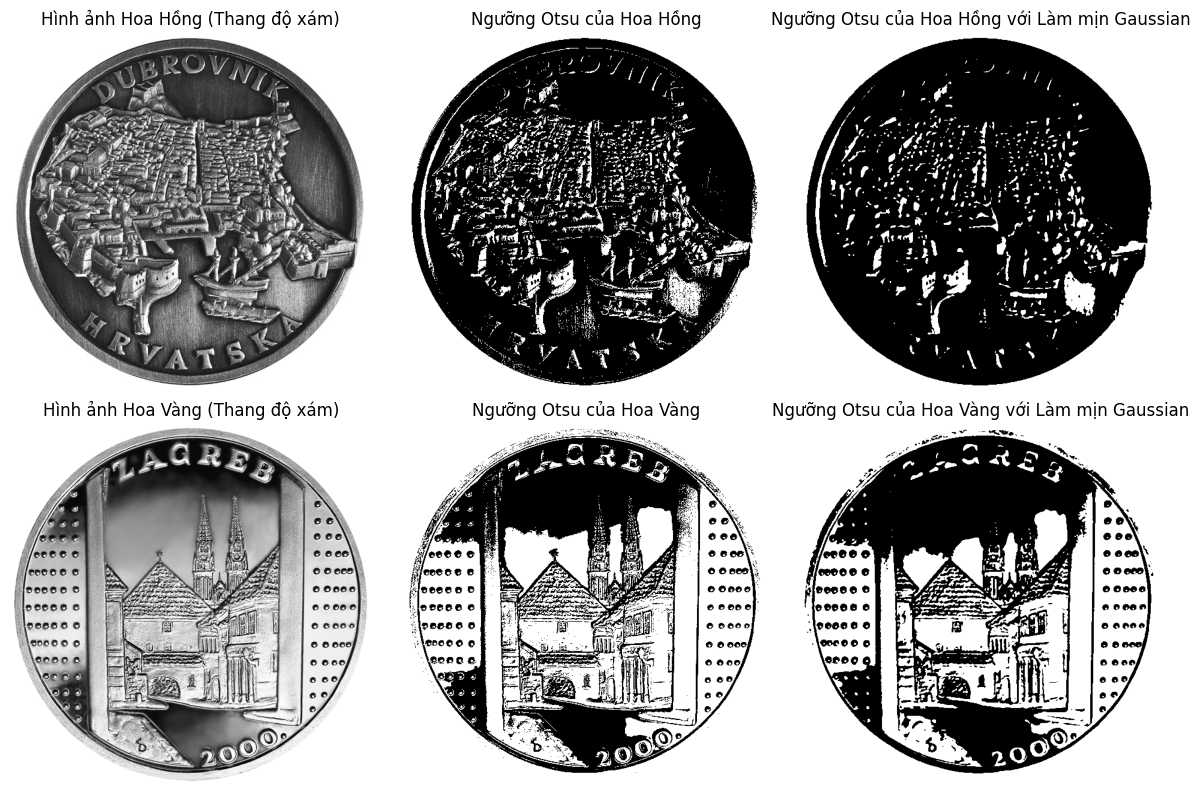

In [ ]:
# Đọc hình ảnh dưới dạng thang độ xám
a1 = cv2.imread('/content/drive/MyDrive/XuLyAnh/LabThucHanh/Image/medalja_dubrovnik.png', cv2.IMREAD_GRAYSCALE)
a2 = cv2.imread('/content/drive/MyDrive/XuLyAnh/LabThucHanh/Image/medalja_kamenita_vrata.png', cv2.IMREAD_GRAYSCALE)

# Hàm áp dụng ngưỡng Otsu
def apply_otsu_thresholding(image, use_gaussian=False):
    if use_gaussian:
        image = cv2.GaussianBlur(image, (5, 5), 0)  # Làm mịn Gaussian
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # Áp dụng ngưỡng Otsu
    return binary_image

# Áp dụng ngưỡng Otsu mà không có làm mịn Gaussian
rose_otsu = apply_otsu_thresholding(a1)
yellow_flower_otsu = apply_otsu_thresholding(a2)

# Áp dụng ngưỡng Otsu với làm mịn Gaussian
rose_otsu_gaussian = apply_otsu_thresholding(a1, use_gaussian=True)
yellow_flower_otsu_gaussian = apply_otsu_thresholding(a2, use_gaussian=True)

# Vẽ kết quả
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(a1, cmap='gray')
plt.title('Hình ảnh Hoa Hồng (Thang độ xám)')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(rose_otsu, cmap='gray')
plt.title("Ngưỡng Otsu của Hoa Hồng")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(rose_otsu_gaussian, cmap='gray')
plt.title("Ngưỡng Otsu của Hoa Hồng với Làm mịn Gaussian")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(a2, cmap='gray')
plt.title('Hình ảnh Hoa Vàng (Thang độ xám)')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(yellow_flower_otsu, cmap='gray')
plt.title("Ngưỡng Otsu của Hoa Vàng")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(yellow_flower_otsu_gaussian, cmap='gray')
plt.title("Ngưỡng Otsu của Hoa Vàng với Làm mịn Gaussian")
plt.axis('off')

plt.tight_layout()
plt.show()

# 3.2

Erosion - Phép co

In [ ]:
anh1 = cv2.imread('/content/drive/MyDrive/XuLyAnh/LabThucHanh/Image/anh1.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(anh1, kernel, iterations = 1)

Dilation - Phép giãn

In [ ]:
dilation = cv2.dilate(anh1, kernel, iterations = 1)

(-0.5, 113.5, 150.5, -0.5)

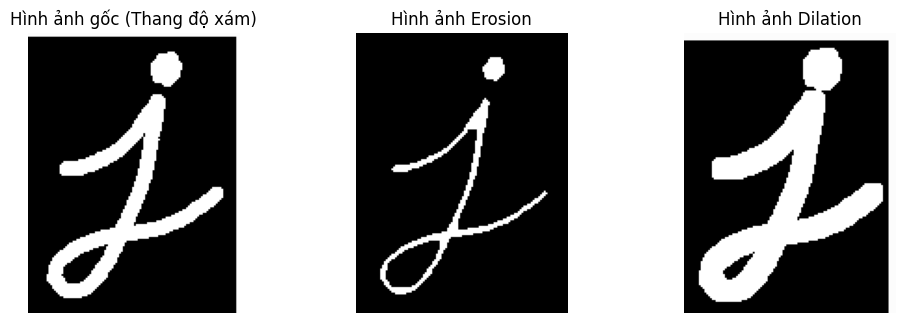

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(anh1, cmap='gray')
plt.title('Hình ảnh gốc (Thang độ xám)')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(erosion, cmap='gray')
plt.title('Hình ảnh Erosion')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(dilation, cmap='gray')
plt.title('Hình ảnh Dilation')
plt.axis('off')

Opening - Mở ảnh

In [ ]:
openingimg = cv2.imread('/content/drive/MyDrive/XuLyAnh/LabThucHanh/Image/opening.png',0)
opening = cv2.morphologyEx(openingimg, cv2.MORPH_OPEN, kernel)

(-0.5, 113.5, 149.5, -0.5)

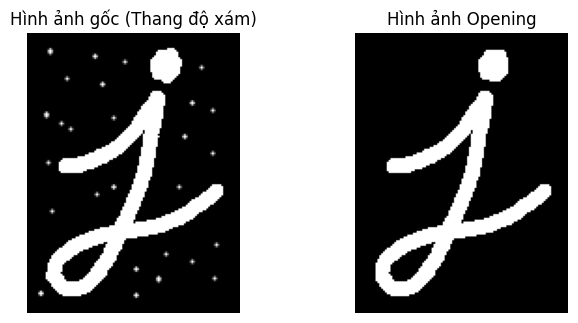

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(openingimg, cmap='gray')
plt.title('Hình ảnh gốc (Thang độ xám)')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(opening, cmap='gray')
plt.title('Hình ảnh Opening')
plt.axis('off')

Closing - Đóng ảnh

In [ ]:
closingimg = cv2.imread('/content/drive/MyDrive/XuLyAnh/LabThucHanh/Image/closing.png',0)
closing = cv2.morphologyEx(closingimg, cv2.MORPH_CLOSE, kernel)

(-0.5, 112.5, 149.5, -0.5)

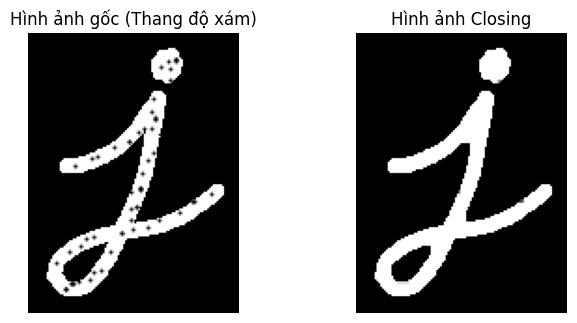

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(closingimg, cmap='gray')
plt.title('Hình ảnh gốc (Thang độ xám)')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(closing, cmap='gray')
plt.title('Hình ảnh Closing')
plt.axis('off')

Some Morphological Algorithms

(-0.5, 176.5, 136.5, -0.5)

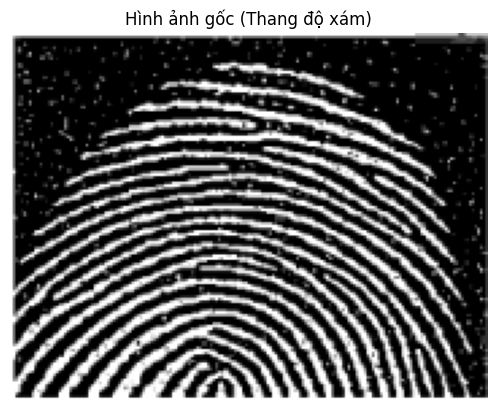

In [ ]:
anh2 = cv2.imread('/content/drive/MyDrive/XuLyAnh/LabThucHanh/Image/anh2.png',0)

plt.imshow(anh2, cmap='gray')
plt.title('Hình ảnh gốc (Thang độ xám)')
plt.axis('off')

In [ ]:
ksize = np.ones((2,2),np.uint8)

(-0.5, 176.5, 136.5, -0.5)

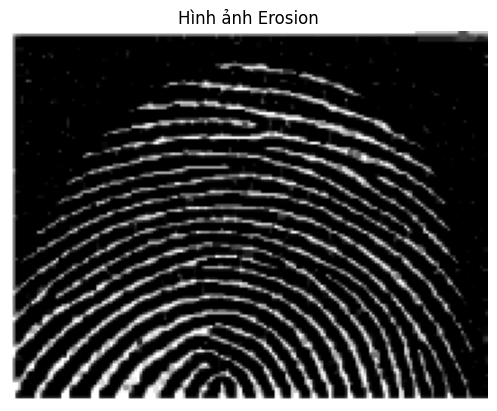

In [ ]:
erosion = cv2.erode(anh2, ksize)

plt.imshow(erosion, cmap='gray')
plt.title('Hình ảnh Erosion')
plt.axis('off')

(-0.5, 176.5, 136.5, -0.5)

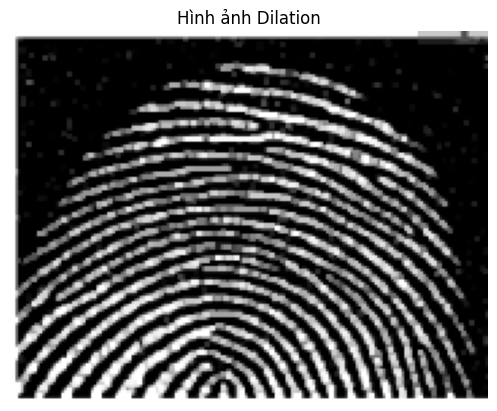

In [ ]:
dilation = cv2.dilate(erosion, ksize)

plt.imshow(dilation, cmap='gray')
plt.title('Hình ảnh Dilation')
plt.axis('off')

(-0.5, 176.5, 136.5, -0.5)

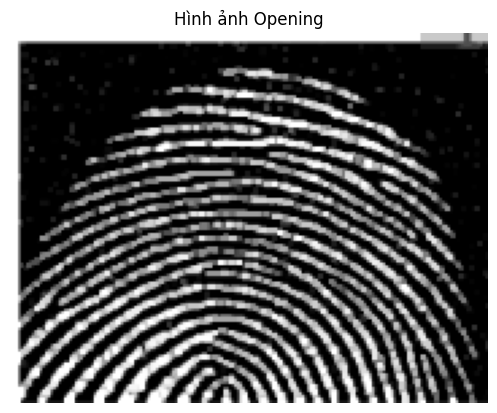

In [ ]:
opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, ksize)

plt.imshow(opening, cmap='gray')
plt.title('Hình ảnh Opening')
plt.axis('off')

(-0.5, 176.5, 136.5, -0.5)

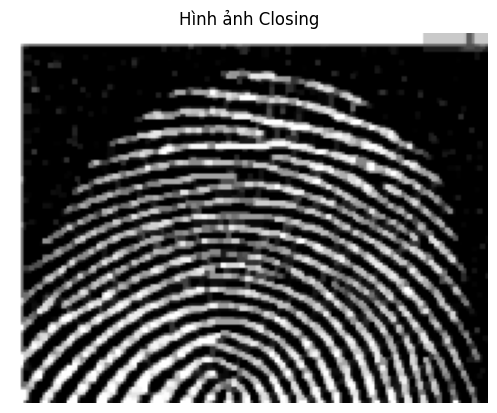

In [ ]:
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, ksize)

plt.imshow(closing, cmap='gray')
plt.title('Hình ảnh Closing')
plt.axis('off')